# Study of symmetric and asymmetric fission of Copernicium-284
### Author: Yuliia Hrabar (yuliia.hrabar@nuclear.lu.se)

## Table of content 
* [Abstract](#abstract)

* [Importing python packages](#import)

* [Reading simulation data from files](#read)
    * [Extracting information from root trees](#root)
    * [Loading data from a binary file](#loading)

* [Asymmetric fission case](#asymmetric)
    * [Constructing  a histogram for implantation detector ](#histo_imp)
    * [Constructing  a histogram for box detectors ](#histo_box)
    * [Energy deposited in implantation vs box detectors](#imp_box)
        * [Events that were registered both at implantation detector and box detectors at the same time](#same)
        * [All events registered at the implantation detector and box detectors](#all_events)

* [Results of all simulations](#all_simulations)
    * [Plot selected simulation](#plot_selected)
    * [Plots of all simulations](#plots_all)
    * [Conlusion](#conclusion)


## Abstract <a name="abstract"></a>

The purpose of this _jupyter notebook_ is to analyze the data produced from simulating spontaneous fission of an alpha decay product Copernicium-284 of Super Heavy Element (SHE) Flevorium-288 and [TASISpec detector setup](https://portal.research.lu.se/portal/files/3183833/4004479.pdf). 


[Recent study](https://epja.epj.org/articles/epja/abs/2020/02/10050_2020_Article_36/10050_2020_Article_36.html) shows that nuclides in the region 74≤Z≤126 and 92≤N≤230 are predicted to fission asymmetrically with Pb-208-like heavy fragments [1]. The main idea behind the study of symmetric and asymmetric fission of Cn-284 is to investigate based on simulations if TASISpec set-up (including dead layers) is sensitive to asymmetric fission during real experiments for creating Fl.

The data was produced by simulating TASISpec with fission products of Cn-284 in [Geant4](https://geant4.web.cern.ch/). Geant4 is a toolkit for simulating the passage of particles through matter. TASISpec setup combines composite Ge- and Si-detectors (Figure 1) for a detector setup aimed towards multi-coincidence gamma -ray, X-ray, conversion electron, fission fragment, and a-particle spectroscopy of the heaviest nuclei. 

 <figure>
  <center>
  <img src="tasispec.jpg" alt="Drawing" style="width: 350px;" align="center">
  <figcaption style="text-align:center">Figure 1 - The full virtual TASISpec setup.  All the Ge-crystals are depicted in blue and Si-detectors are surrounded by green colour. [2]</figcaption>
  </center>
</figure> 

Main detectors of interest from the TASISpec setup for the simulation of fission products are four double-sided silicon strip detectors (DSSSDs) constructing a 'box detector' and one DSSSD facing a particle beam line - an 'implantation detector' (Figure 2). 
 <figure>
  <center>
  <img src="dsssds.jpg" alt="Drawing" style="width: 250px;" align="center">
  <figcaption style="text-align:center">Figure 2 - Si-detectors: the implantation detector and box DSSSDs. [2] </figcaption>
  </center>
</figure> 

Next Cn-284 fission scenarios were simulated in Geant4 - two cases of asymmetric fission (A1/A2 = 0.37 and 0.62) and one case of symmetric fission (A1/A2 = 1) for total kinetic energies of 225, 250 and 275 MeV. Parameters such as atomic number, mass number and kinetic energies of fission fragments used for the scenarios are presented in the following table. 

| TKE [MeV] | A1 | A2 | E1 [MeV] | E2 [MeV] | Z1 | Z2 |
|------|------|------|------|------|------|------|
| 225 	| 76  | 208 | 164.7887 | 60.2113  | 30 | 82 |  
| 225 	| 109 | 175 | 138.6444 | 86.3556  | 41 | 71 | 	
| 225 	| 142 | 142 | 112.5000 | 112.5000 | 53 | 59 | 
| 250 	| 76  | 208 | 183.0986 | 66.1940  | 30 | 82 | 
| 250 	| 109 | 175 | 154.0493 | 95.9507  | 41 | 71 | 
| 250 	| 142 | 142 | 125.0000 | 125.0000 | 53 | 59 | 	
| 275 	| 76  | 208 | 201.4085 | 73.5915  | 30 | 82 |  
| 275 	| 109 | 175 | 169.4542 | 105.5458 | 41 | 71 | 
| 275 	| 142 | 142 | 137.5000 | 137.5000 | 53 | 59 | 

The data analysis can roughly be divided into four steps:
1. Read simulated data from ROOT files into pandas DataFrame
2. Maniplate and group data to plot histograms for implantation and box detectors 
3. Maniplate and group data to plot energy deposited in the implant detector vs. box detectors

**References**<br>
[1] M. Albertsson, B. G. Carlsson, et al., Calculated fission-fragment mass yields and average total kinetic energies of heavy and superheavy nuclei, Eur. Phys. J. A (2020) 56: 46
<br>
[2] L.G.Sarmiento, L.-L.Andersson, D.Rudolph, A Geant4 simulation package for the TASISpec experimental detector setup, Elsevier, (2012) 667: 26-31

# Importing python packages<a name="import"></a>

Packages for reading, storing and manipulating data:

In [1]:
import pandas as pd # to process large data sets
import numpy as np # to perform numerical operations

Plotting:

In [2]:
# to have interactive (zoom-able and resize-able) plots 
%matplotlib notebook 
import matplotlib.pyplot as plt

# Reading simulation data from files<a name="read"></a>

Results of Geant4 simulations are stored in ROOT tree format in .root files with naming scheme as "PICOSpec_TKE_A1_A2.root", where TKE is a total kinetic energy of fission fragments with mass numbers A1 and A2.  

## Extracting information from ROOT trees <a name="root"></a>

Extracting information from GEANT4 .root files was done in another Jupyter Notebook [**GEANT4_Read_ROOT_files**](GEANT4_Read_ROOT_files.ipynb) in order to facilitate execution of this (**GEANT4_FissionFragments**) notebook.

**GEANT4_Read_ROOT_files** notebook extracts information from ROOT trees and stores it into pandas `DataFrame`. The dataframe is then saved into binary file **fission_data.pk1**. This notebook reads the binary file into a DataFrame.

## Loading data from a binary file <a name="loading"></a>

Code below checks if current folder contains **fission_data.pk1** file with data. If the file does not exists, it runs [**GEANT4_Read_ROOT_files**](GEANT4_Read_ROOT_files.ipynb) notebook to produce the file.

In [3]:
filename = 'fission_data.pk1' 
# checking if current folder contains the file 
my_list = !ls
if filename in my_list: # check if the file exists in the current directory list 
    data = pd.read_pickle(filename) # load DataFrame 
else:
    %run GEANT4_Read_ROOT_files.ipynb # running the notebook that produces the 'fission_data.pk1' file
    data = pd.read_pickle(filename) # load DataFrame 

Below is the final `DataFrame` with all relevant results produced by running simulations in Geant4. Simulations were run with fission products **A1** and **A2** and total kinetic energy **TKE**. For each simulations all **Event**s were extracted from ROOT trees. There are multiple hits of different **Energy** in different pixels **DetID** of detectors of TASISpec set-up per **Event**.

In [4]:
data

Event         Energy  DetID
TKE   A1  A2                              
225.0 76  208      0  204701.274291    593
          208      1  210576.180404    433
          208      2  203917.364536    433
          208      3  225000.000000    560
          208      4   90427.887638    591
...              ...            ...    ...
275.0 142 142   2490  275000.000000    336
          142   2491  237954.660832    716
          142   2492  250077.094510    430
          142   2493  189529.601536    372
          142   2493   13364.919537   1788

[30071 rows x 3 columns]

# Asymmetric fission case <a name="asymmetric"></a>

Extract part of data describing asymmetric fission with TKE=225 MeV and fission products A1=76 and A2=208.

In [5]:
asymm225 = data.loc[225,76,208] 
asymm225

Event         Energy  DetID
TKE   A1 A2                              
225.0 76 208      0  204701.274291    593
         208      1  210576.180404    433
         208      2  203917.364536    433
         208      3  225000.000000    560
         208      4   90427.887638    591
...             ...            ...    ...
         208   2492  225000.000000    234
         208   2493  111940.697828    752
         208   2493   67817.177503   1112
         208   2494  105365.460921    301
         208   2494   72562.864414   1604

[3297 rows x 3 columns]

## Constructing  a histogram for implantation detector <a name="histo_imp"></a>

Choose energies detected in the implantation detector. Implantation detector is divided into 1024 pixels sensible for particle hits. Therefore, to get hits in the implantation detectors only entries with **DetID** < 1024 are selected. 

In [6]:
E_imp_histo = (asymm225.loc[asymm225['DetID']<1024].Energy)

Plot energy spectrum of the implantation detector with `pandas.DataFrame.plot.hist`. 

<IPython.core.display.Javascript object>


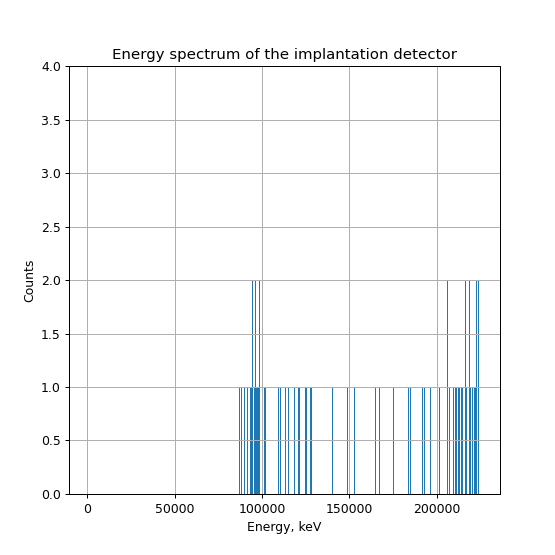

In [12]:
plt.figure(num=None, figsize=(6.2, 6.2))
ax_imp = E_imp_histo.plot.hist(grid=True,bins=10000)
ax_imp.set(title = 'Energy spectrum of the implantation detector', xlabel = 'Energy, keV', ylabel = 'Counts')
ax_imp.set_ylim([0,4])
plt.savefig('output/implant_histogram.eps', format='eps', dpi=300)

## Constructing  a histogram for box detectors <a name="histo_box"></a>

Choose energies detected in the box detectors. Box detectors **DetID** is within range of 1024 and 2048.  

In [8]:
E_box_histo = asymm225.loc[(asymm225['DetID']>1024) & (asymm225['DetID']<2048)].Energy

Plot energy spectrum of the box detectors with `pandas.DataFrame.plot.hist`. 

<IPython.core.display.Javascript object>


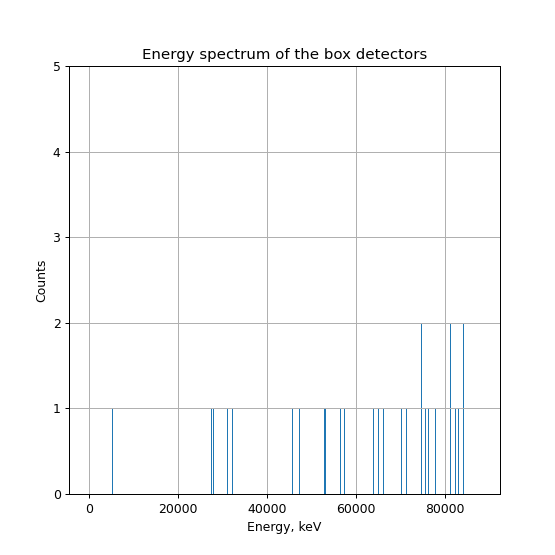

In [11]:
plt.figure(num=None, figsize=(6.2, 6.2))
ax_box = E_box_histo.plot.hist(grid=True, bins=10000)
ax_box.set(title = 'Energy spectrum of the box detectors', xlabel = 'Energy, keV', ylabel = 'Counts')
ax_box.set_ylim([0,5])
plt.savefig('output/box_histogram.eps', format='eps', dpi=300)

## Energy deposited in implantation vs box detectors <a name="imp_box"></a>

Extract energies for the implantation detector and sum them for the same event.

In [13]:
df_imp = asymm225.loc[asymm225['DetID']<1024].groupby(['Event'], sort=False).Energy.sum()
df_imp

Event
0       204701.274291
1       210576.180404
2       203917.364536
3       225000.000000
4        90427.887638
            ...      
2490    204768.379839
2491    225000.000000
2492    225000.000000
2493    111940.697828
2494    105365.460921
Name: Energy, Length: 2495, dtype: float64

Extract energies for the box detectors and sum them for the same event 

In [14]:
df_box = (asymm225.loc[(asymm225['DetID']>1024) & (asymm225['DetID']<2048)]).groupby(['Event'], sort=False).Energy.sum()
df_box

Event
6       13003.177303
7       46774.410964
8       73653.494860
10      51774.535583
14      45167.071860
            ...     
2470    42475.820865
2476    85216.806722
2479    61416.691818
2493    67817.177503
2494    72562.864414
Name: Energy, Length: 755, dtype: float64

### Events that were registered both at implantation detector and box detectors at the same time  <a name="same"></a>

Join DataFrames for the implantation and box detectors based on the event

In [15]:
df_imp_box = pd.merge(df_box, df_imp, on='Event', suffixes=('_box', '_imp'))
df_imp_box

,Energy_box,Energy_imp
Event,,
6,13003.177303,155254.869971
7,46774.410964,126074.036881
8,73653.494860,102015.976700
10,51774.535583,121430.387101
14,45167.071860,126172.336153
...,...,...
2470,42475.820865,130610.909625
2476,85216.806722,94865.035566
2479,61416.691818,114149.855479


<IPython.core.display.Javascript object>


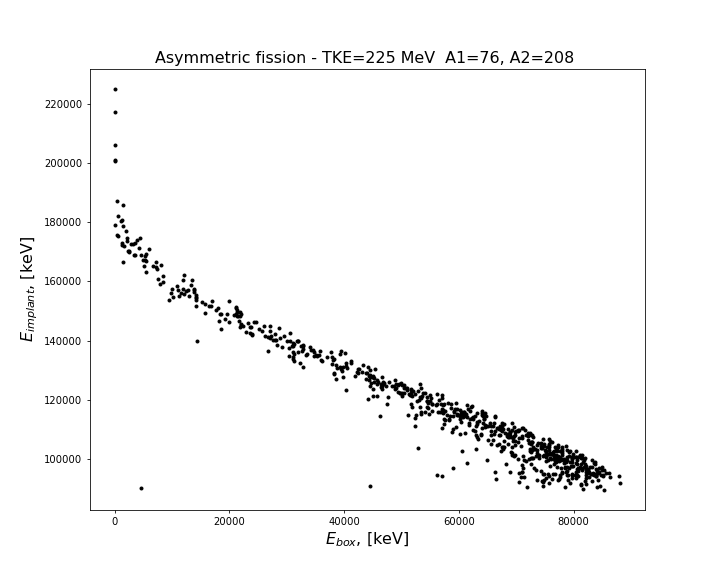

For N=2500 runs


In [16]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot( df_imp_box.Energy_box, df_imp_box.Energy_imp, '.', color='black');
plt.title('Asymmetric fission - TKE=225 MeV  A1=76, A2=208 ', fontsize=16)
plt.xlabel('$E_{box}$, [keV]', fontsize=16)
plt.ylabel('$E_{implant}$, [keV]', fontsize=16)
plt.savefig('output/asymmetric_255_76_208_imp_box.eps', format='eps', dpi=300)
print("For N=2500 runs")

The plot above shows the case of **_asymmetric fission_** with TKE of 225 MeV and two fission products 'light' **Zn-76** and 'heavy' **Pb-208**. Their initial kinetic energy in the simulation was set to be 164.7887 MeV and 60.2113 MeV respectively. Only events where energy was deposited both on the implantation and box detectors are plotted. 

From the plot it is clear that 'heavy' fission product always gets fully stopped in the implantation detector. As for 'light' fission product - it losses part of its energy in the implantation detector and therefore, box detectors do not register full its intitial kinetic energy of 165 MeV. 

### All events registered at the implantation detector and box detectors <a name="all_events"></a>

In [17]:
df_imp_box_all = pd.merge(df_imp, df_box, on='Event', how='outer', suffixes=('_imp', '_box'))
df_imp_box_all.fillna(0, inplace=True) #fill NaN with zeros
df_imp_box_all

,Energy_imp,Energy_box
Event,,
0,204701.274291,0.000000
1,210576.180404,0.000000
2,203917.364536,0.000000
3,225000.000000,0.000000
4,90427.887638,0.000000
...,...,...
2490,204768.379839,0.000000
2491,225000.000000,0.000000
2492,225000.000000,0.000000


<IPython.core.display.Javascript object>


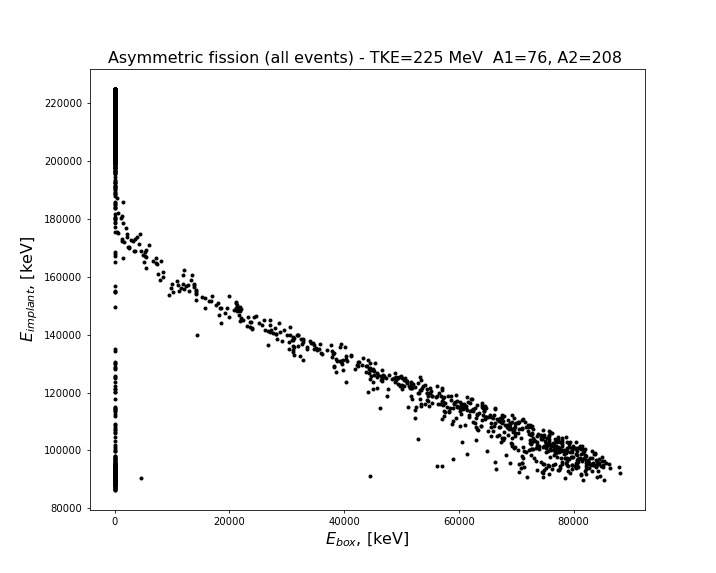

For N=2500 runs


In [18]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot( df_imp_box_all.Energy_box, df_imp_box_all.Energy_imp, '.', color='black');
plt.title('Asymmetric fission (all events) - TKE=225 MeV  A1=76, A2=208 ', fontsize=16)
plt.xlabel('$E_{box}$, [keV]', fontsize=16)
plt.ylabel('$E_{implant}$, [keV]', fontsize=16)
plt.savefig('output/asymmetric_255_76_208_imp_box_all.eps', format='eps', dpi=300)
print("For N=2500 runs")

The plot above shows the same case of **_asymmetric fission_** with TKE of 225 MeV and two fission products 'light' Zn-76 and 'heavy' Pb-208. This time the plot includes **all events** - even when box detectors were not hit. 

Multiple values of energies deposited in implantation detector E_box = 0 keV (vox not hit) are shown on the figure. Those values represent sum of energy deposited by 'light' and 'heavy' fission products in the implantation detector. The highest value for such case is 225 MeV - both fragments were completely stopped witin the implantation detector. It is expected for the case when both fragments were emitted with the direction of their momentum along the detector. Values of the sum that are less than 225 MeV in the implant can be explained with the fact that 'light' fission product is emitted to the back of the detector and thus its full energy is not being recorded. 



# Results of all simulations<a name="all_simulations"></a>

Define function `select_implant_box_energy` to help plotting

In [19]:
def select_implant_box_energy(data, TKE, A1, A2):
    df = data.loc[TKE,A1,A2] 
    df_imp = df.loc[df['DetID']<1024].groupby(['Event'], sort=False).Energy.sum()
    df_box = (df.loc[(df['DetID']>1024) & (df['DetID']<2048)]).groupby(['Event'], sort=False).Energy.sum()
    df_final = pd.merge(df_imp, df_box, on='Event', how='outer', suffixes=('_imp', '_box'))
    df_final.fillna(0, inplace=True)
    E_box = df_final.Energy_box/1000
    E_imp = df_final.Energy_imp/1000
    return E_box, E_imp

## Plot selected simulation  <a name="plot_selected"></a>

Make indifidual plot with results of simulation of interest based on **TKE**, **A1** and **A2**:

In [20]:
from ipywidgets import interact, interactive, fixed

def plot_cos_decay(TKE, A):
    print(TKE)
    print(A[0])
    print(A[1])
    E_box, E_imp = select_implant_box_energy(data, TKE, A[0], A[1])
    plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot( E_box, E_imp, '.', color='black');
    plt.title(' TKE={} MeV  A1={}, A2={} '.format(TKE, A[0], A[1]), fontsize=16)
    plt.xlabel('$E_{box}$, [MeV]', fontsize=16)
    plt.ylabel('$E_{implant}$, [MeV]', fontsize=16)
    plt.savefig('output/fission_{}_{}_{}.eps'.format(TKE, A[0], A[1]), format='eps', dpi=300)

    
interactive_plot = interactive(plot_cos_decay, TKE=[225, 250, 275], A=[('142 142', [142, 142]), ('109 175', [109, 175]), ('76 208', [76, 208])])
interactive_plot.children[0].description=r'$TKE$' # slider
interactive_plot.children[1].description=r'$A$' # slider
interactive_plot

interactive(children=(Dropdown(description='$TKE$', options=(225, 250, 275), value=225), Dropdown(description=…

## Plots of all simulations  <a name="plots_all"></a>

<IPython.core.display.Javascript object>


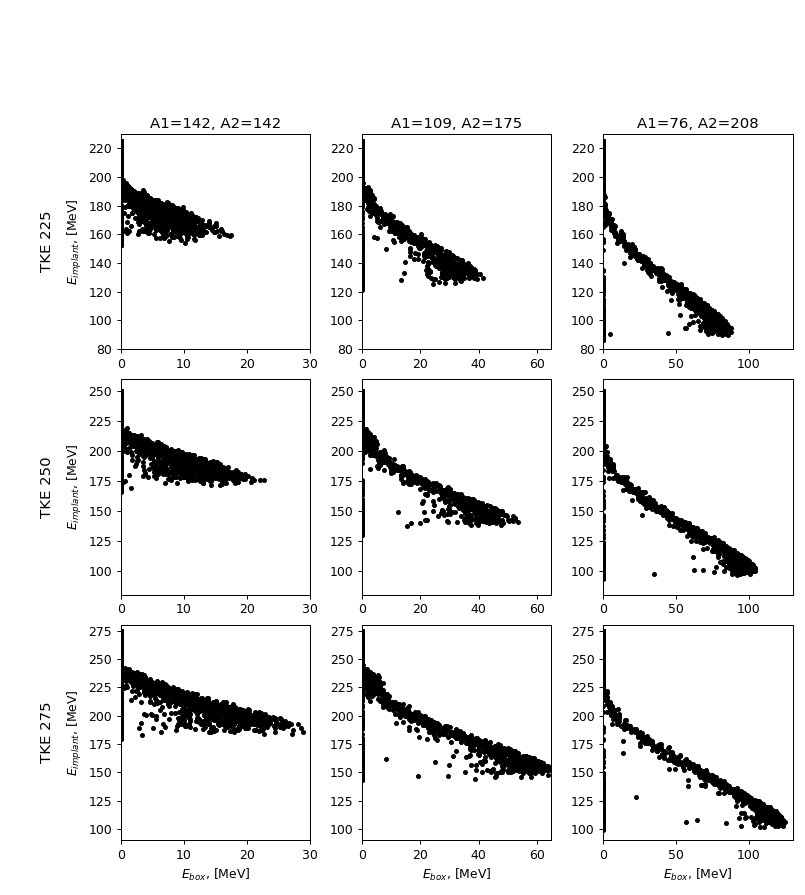

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(9,10))

TKE = [225, 250, 275]
A = [[142,142],[109,175],[76,208]]

# Fill plots 
for i, E in enumerate(TKE):
    for j, Ax in enumerate(A):
        E_box, E_imp = select_implant_box_energy(data, E, Ax[0], Ax[1])
        axs[i, j].plot(E_box, E_imp, '.', color='black')

# Label all plots
for i in range(3):
    axs[i, 0].set(ylabel="$E_{implant}$, [MeV]")
    axs[-1, i].set(xlabel="$E_{box}$, [MeV]")
    
# Add specific labels to all rows and columns 
cols = ['A1=142, A2=142', 'A1=109, A2=175', 'A1=76, A2=208']
rows = ['TKE {}'.format(row) for row in ['225', '250', '275']]
pad = 5 # in points
for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right',rotation=90, va='center')
    
# Set x and y lims for all plots 
x_lims = [[0,30], [0, 65], [0, 130]]
y_lims = [[80, 230], [80, 260], [90, 280]]
for i in range(len(x_lims)):
    for ax in axs[i]:
        ax.set_ylim(y_lims[i])
    for ax in axs[:, i]: 
        ax.set_xlim(x_lims[i]) 


fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.85)
fig.savefig('output/fission_composite_plot.eps', format='eps', dpi=300)


# Conclusion <a name="conclusion"></a>

The jupyter notebook compares the case of **symmetric fission** (A1/A2 = 1) to two cases of **asymmetric fission** (A1/A2 = 0.37 and 0.62). The latter one includes Pb-208 as one of its fission products.

One can clearly distinguish between the asymmetric and symmetric cases from the composite figure. Thus, with the assumptions and conditions used for the Geant4 simulation, a conclusion can be made that TASISpec set-up should be sensitive to asymmetric fission during real experiments, including the case when Pb-208 is a fission product. 

However, the statistics in the Geant4 simulation (2500 runs) is a lot higher than what one has with super heavy  experiments (up to 30 events per experiment).


Additionally, analysing pixel-pixel combinations individually is foreseen to better restrict the results. And including uncertainties is essential to provide a conclusion with confidence.